<a href="https://colab.research.google.com/github/Vaibhav-sa30/Primer-For-Deep-Learning-Using-Pytorch/blob/main/Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
from torch import tensor


A tensor can be a 0D (scalar), 1D (vector), 2D (matrix), or have higher dimensions (3D, 4D, etc.).

Tensors can represent a wide range of data, including scalars, vectors, images, volumes, and more, making them versatile for various machine learning and scientific computing tasks.

In [5]:
x = torch.randint(high = 4, size = (3,3), generator =torch.random.manual_seed(42))

print(x)

tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


In [6]:
y = torch.randint(high =4, size = (3,3), generator = torch.random.manual_seed(42))

print(y)

tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


In [7]:
z = torch.randint(high = 4, size = (3,3), generator = torch.random.manual_seed(42))

print(z)

tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


In [14]:
#X TENSOR INFORMATION
print("x tensor info:")
print(x.shape)
print(x.size())
print(x.ndimension())
#To check whether tensor is placed on cpu or gpu
print(x.device)
print('\n')

#Y TENSOR INFORMATION
print("y tensor info:")
print(y.shape)
print(y.size())
print(y.ndimension())
#To check whether tensor is placed on cpu or gpu
print(y.device)
print('\n')

#Z TENSOR INFORMATION
print("z tensor info:")
print(z.shape)
print(z.size())
print(z.ndimension())
#To check whether tensor is placed on cpu or gpu
print(z.device)


x tensor info:
torch.Size([3, 3])
torch.Size([3, 3])
2
cpu


y tensor info:
torch.Size([3, 3])
torch.Size([3, 3])
2
cpu


z tensor info:
torch.Size([3, 3])
torch.Size([3, 3])
2
cpu


In [15]:
b = x
print(b is x)

True


In [16]:
print(b)
print(x)

tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])
tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


In [17]:
b[0,0] = 0

In [18]:
print(x)

tensor([[0, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


Change in one variable affects other. So be mindful of this.

In [19]:
import copy

In [21]:
b = copy.deepcopy(x)
print(b is x)

False


To negate we can use this

In [22]:
print(-1*x)

tensor([[ 0, -3,  0],
        [-2, -2, -3],
        [ 0,  0, -2]])


But we should use this. Because it actually changes binary representation of each elements. Without increasing computation.

In [23]:
print(x.neg())

tensor([[ 0, -3,  0],
        [-2, -2, -3],
        [ 0,  0, -2]])


Apply an activation function

In [24]:
print(torch.sigmoid(x))

tensor([[0.5000, 0.9526, 0.5000],
        [0.8808, 0.8808, 0.9526],
        [0.5000, 0.5000, 0.8808]])


In [25]:
print(x.T)

tensor([[0, 2, 0],
        [3, 2, 0],
        [0, 3, 2]])


Transposeing is a 2D operation. It is easy for 2D but will have to ask which face, if you're doing for higher dimensions

In [27]:
print(torch.transpose(x, 1, 0))

tensor([[0, 2, 0],
        [3, 2, 0],
        [0, 3, 2]])


In [30]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
response = requests.get("https://media.istockphoto.com/photos/beautiful-lionhead-goldfish-swimming-in-the-aquarium-picture-id905382158")

img = Image.open(BytesIO(response.content))
img = np.array(img)

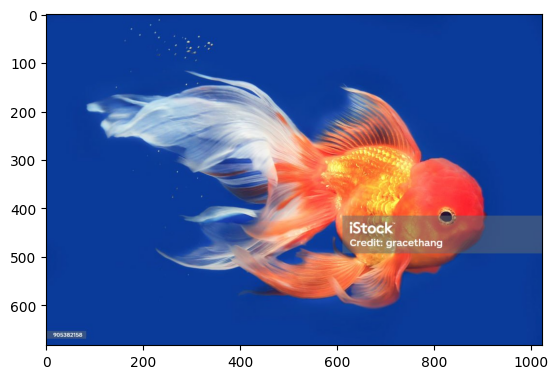

In [33]:
plt.imshow(img)
plt.show()

In [34]:
t_img = torch.tensor(img)
print(t_img.shape)

torch.Size([683, 1024, 3])


In [ ]:
#All channels are of same shape

#but to access a specific channel then we have to specify the 3rd attribute accordingly

#To specify the red channel
t_img[:,:,0]

#To specify the green channel
t_img[:,:,1]

#To specify the blue channel
t_img[:,:,2]

In [ ]:
t_img[:,:,]

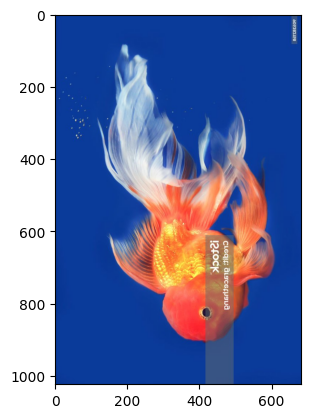

In [35]:
t_img_T = torch.transpose(t_img, dim0=1, dim1 = 0)

#or just use this:
#t_img_T = torch.transpose(t_img, 1, 0)

plt.imshow(np.array(t_img_T))
plt.show()

In [36]:
t_img_T.shape

torch.Size([1024, 683, 3])

In [ ]:
t_img.T

Let's Study Concatenation

In [37]:
print(x, '\n', y, '\n', z)

tensor([[0, 3, 0],
        [2, 2, 3],
        [0, 0, 2]]) 
 tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]]) 
 tensor([[2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


In [38]:
hcat = torch.cat((x,y,z), dim = 1)
vcat = torch.cat((x,y,z), dim = 0)

print(hcat)
print(vcat)

tensor([[0, 3, 0, 2, 3, 0, 2, 3, 0],
        [2, 2, 3, 2, 2, 3, 2, 2, 3],
        [0, 0, 2, 0, 0, 2, 0, 0, 2]])
tensor([[0, 3, 0],
        [2, 2, 3],
        [0, 0, 2],
        [2, 3, 0],
        [2, 2, 3],
        [0, 0, 2],
        [2, 3, 0],
        [2, 2, 3],
        [0, 0, 2]])


Let's learn STACKING

Stacking introduces depth or in other words adds dimensions.

In [39]:
dcat = torch.stack((x,y,z))
print(dcat)
print(dcat.shape)

tensor([[[0, 3, 0],
         [2, 2, 3],
         [0, 0, 2]],

        [[2, 3, 0],
         [2, 2, 3],
         [0, 0, 2]],

        [[2, 3, 0],
         [2, 2, 3],
         [0, 0, 2]]])
torch.Size([3, 3, 3])


 The resulting tensor has more dimensions than the input tensors, and it contains the input tensors as its elements along that new dimensions.


---


 ### Why Stacking?

 Stacking is particularly useful when you want to combine multiple tensors with the same shape along a new dimension to perform operations on them collectively.

In [42]:
logit = dcat.type(dtype = torch.float64)

prob = torch.softmax(logit, dim = 2)

print(prob)

tensor([[[0.0453, 0.9094, 0.0453],
         [0.2119, 0.2119, 0.5761],
         [0.1065, 0.1065, 0.7870]],

        [[0.2595, 0.7054, 0.0351],
         [0.2119, 0.2119, 0.5761],
         [0.1065, 0.1065, 0.7870]],

        [[0.2595, 0.7054, 0.0351],
         [0.2119, 0.2119, 0.5761],
         [0.1065, 0.1065, 0.7870]]], dtype=torch.float64)


##### Dim 0 - 1 bracket in - 1 element from each matrix (RGB)
##### Dim 1 - 2 bracket in - 1 element form each row(or array) of each matrix (RGB)
##### Dim 2 - 3 bracket in - 1 element at a time
